# RL for Sum of Discounted Reward
- Lagrange RL
    + dense: $\ell / 500$ 
    + sparse: +1, -1
- cost profile:
    when scaling = 1, $\ell(x) \in [-0.75, 9.75]$

In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

from gym_reachability import gym_reachability  # Custom Gym env.
import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
from collections import namedtuple

from KC_DQN.DDQN import DDQN
from KC_DQN.config import dqnConfig

In [2]:
#== CONFIGURATION ==
env_name = "zermelo_kc-v0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CONFIG = dqnConfig(DEVICE=device, BATCH_SIZE=200, ENV_NAME=env_name, MAX_EPISODES=80000, MAX_EP_STEPS=100, MEMORY_CAPACITY=20000,
                   GAMMA_PERIOD=80000,
                   EPS_PERIOD=2000, EPS_DECAY=0.6,
                   LR_C_PERIOD=8000, LR_C_DECAY=0.8)

In [3]:
# == Environment ==
penalty = 1
reward = -1
scaling = 1./500
env = gym.make(env_name, device=device)
env.set_costParam(penalty, reward, 'dense_ell', scaling)

# == Discretization ==
grid_cells = (41, 121)
num_states = np.cumprod(grid_cells)[-1]
state_bounds = env.bounds
env.set_discretization(grid_cells, state_bounds)
print(env.spec.id)

s_dim = env.observation_space.shape[0]
action_num = env.action_space.n
print(s_dim, action_num)

action_list = np.arange(action_num)

zermelo_kc-v0
2 3


/Users/kaichieh/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Ep[  0] - [0.95/0.900/1.0e-02]: Running cost: 0.12 	 Real cost: 1.24


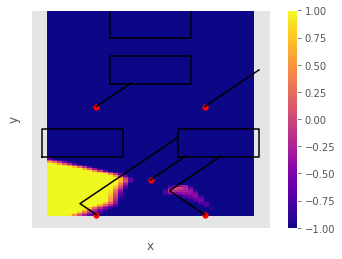

Ep[4000] - [0.34/0.900/1.0e-02]: Running cost: 0.68 	 Real cost: -1.00


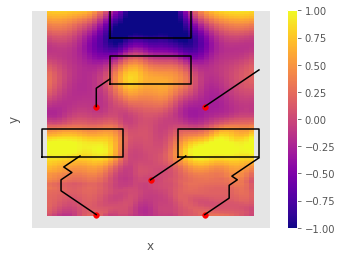

Ep[8000] - [0.12/0.900/8.0e-03]: Running cost: 0.59 	 Real cost: 1.44


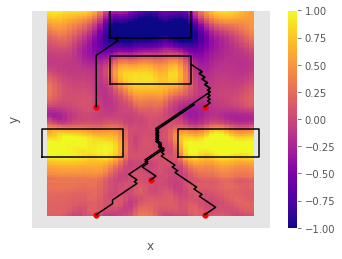

Ep[12000] - [0.05/0.900/8.0e-03]: Running cost: 0.40 	 Real cost: 1.00


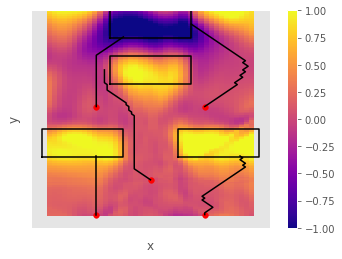

Ep[16000] - [0.05/0.900/6.4e-03]: Running cost: -0.10 	 Real cost: -0.46


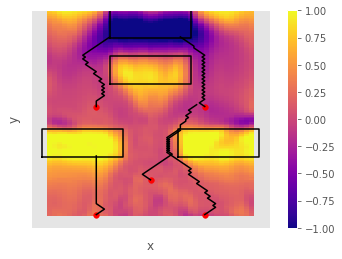

Ep[20000] - [0.05/0.900/6.4e-03]: Running cost: -0.17 	 Real cost: 1.88


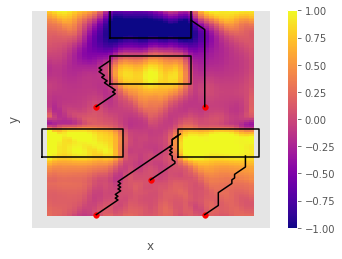

Ep[24000] - [0.05/0.900/5.1e-03]: Running cost: 0.10 	 Real cost: -0.95


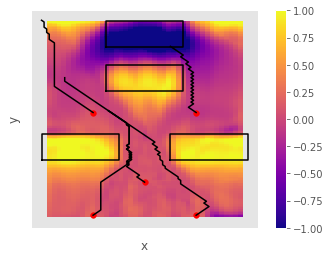

Ep[28000] - [0.05/0.900/5.1e-03]: Running cost: 0.69 	 Real cost: 1.17


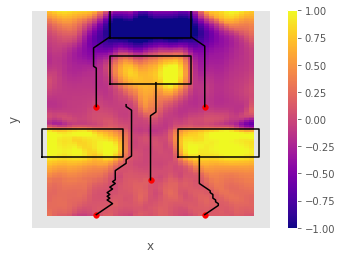

Ep[32000] - [0.05/0.900/4.1e-03]: Running cost: -0.14 	 Real cost: -0.12


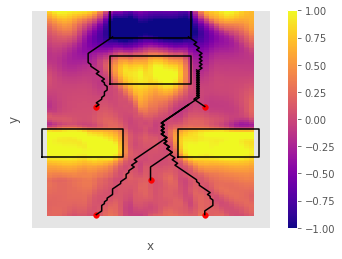

Ep[36000] - [0.05/0.900/4.1e-03]: Running cost: 0.16 	 Real cost: 1.52


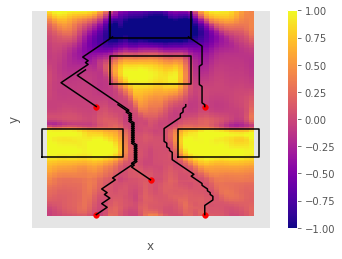

Ep[40000] - [0.05/0.900/3.3e-03]: Running cost: 0.12 	 Real cost: -0.43


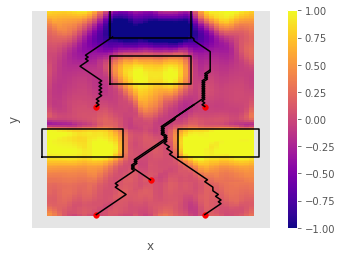

Ep[44000] - [0.05/0.900/3.3e-03]: Running cost: -0.38 	 Real cost: -0.95


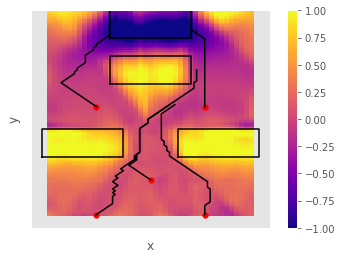

Ep[48000] - [0.05/0.900/2.6e-03]: Running cost: 0.01 	 Real cost: 1.00


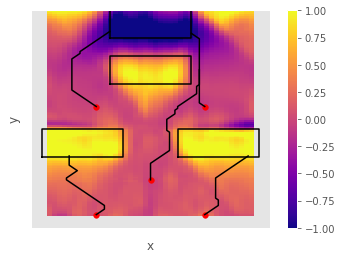

Ep[52000] - [0.05/0.900/2.6e-03]: Running cost: 0.29 	 Real cost: 1.33


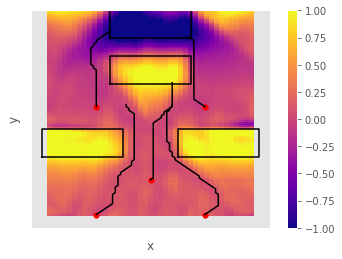

Ep[56000] - [0.05/0.900/2.1e-03]: Running cost: -0.03 	 Real cost: -0.33


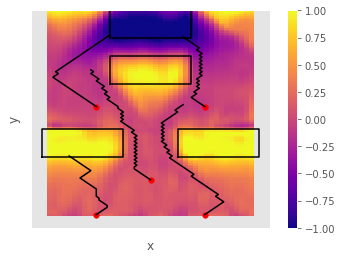

Ep[60000] - [0.05/0.900/2.1e-03]: Running cost: -0.27 	 Real cost: -0.88


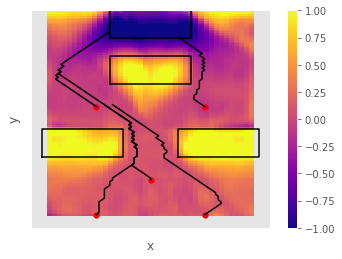

Ep[64000] - [0.05/0.900/1.7e-03]: Running cost: -0.00 	 Real cost: 0.04


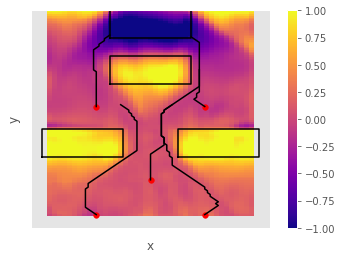

Ep[68000] - [0.05/0.900/1.7e-03]: Running cost: 0.20 	 Real cost: 1.30


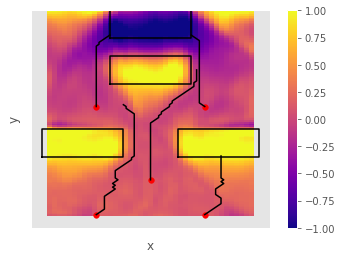

Ep[72000] - [0.05/0.900/1.3e-03]: Running cost: 0.19 	 Real cost: 1.00


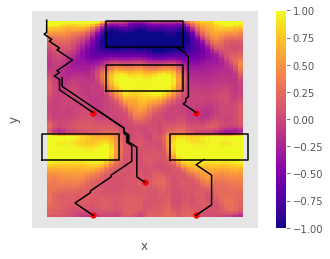

Ep[76000] - [0.05/0.900/1.3e-03]: Running cost: -0.02 	 Real cost: -0.97


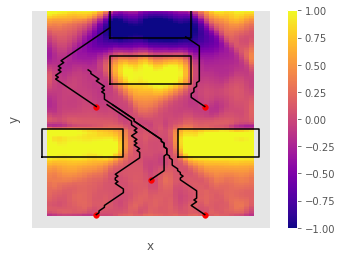

In [4]:
#== AGENT ==
vmin = -1
vmax = 1
agent=DDQN(s_dim, action_num, CONFIG, action_list)
training_records = agent.learn(env, MAX_EPISODES=CONFIG.MAX_EPISODES, MAX_EP_STEPS=CONFIG.MAX_EP_STEPS,
                               running_cost_th=reward*0.9, report_period=4000, vmin=vmin, vmax=vmax)

[[0.11332035 0.16237092 0.17986679 ... 1.07040596 1.23900747 1.42242897]
 [0.11330676 0.16833425 0.18741846 ... 1.05302072 1.21061468 1.38311124]
 [0.14354968 0.18954778 0.19772887 ... 1.02911091 1.17889404 1.34547138]
 ...
 [0.10509151 0.14037514 0.16201401 ... 0.87715197 1.00431204 1.15325165]
 [0.12664181 0.13892984 0.14330339 ... 0.93791968 1.06441307 1.21091747]
 [0.09515256 0.12667459 0.13666296 ... 0.94087583 1.09425664 1.24986219]]


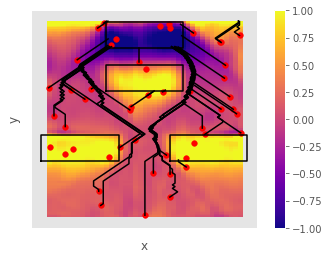

In [10]:
print(env.get_value(agent.Q_network))
env.visualize_analytic_comparison(agent.Q_network, True, vmin=-1, vmax=1)
#env.plot_trajectories(agent.Q_network, T=60, num_rnd_traj=5, states=env.visual_initial_states)
env.plot_trajectories(agent.Q_network, T=100, num_rnd_traj=50)
plt.savefig('figure/lagrange_1_1_500.eps')

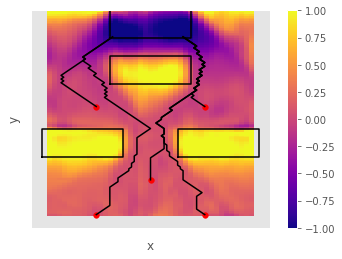

In [9]:
env.visualize_analytic_comparison(agent.Q_network, True, vmin=-1, vmax=1)
env.plot_trajectories(agent.Q_network, T=150, num_rnd_traj=5, states=env.visual_initial_states)